Data Import

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read csv file
data = pd.read_csv(r"C:\Files\Unified Internship\Project-1\CloudWatch_Traffic_Web_Attack.csv")
data.head()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule


Data Preprocessing

In [3]:
# Check for missing values and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bytes_in             282 non-null    int64 
 1   bytes_out            282 non-null    int64 
 2   creation_time        282 non-null    object
 3   end_time             282 non-null    object
 4   src_ip               282 non-null    object
 5   src_ip_country_code  282 non-null    object
 6   protocol             282 non-null    object
 7   response.code        282 non-null    int64 
 8   dst_port             282 non-null    int64 
 9   dst_ip               282 non-null    object
 10  rule_names           282 non-null    object
 11  observation_name     282 non-null    object
 12  source.meta          282 non-null    object
 13  source.name          282 non-null    object
 14  time                 282 non-null    object
 15  detection_types      282 non-null    object
dtypes: int64

In [4]:
#check shape of data
data.shape

(282, 16)

In [5]:
# Remove duplicate rows
data.drop_duplicates()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,41336,13180,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,136.226.77.103,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
278,3638,3190,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,165.225.26.101,DE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
279,25207794,1561220,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,155.91.45.242,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule
280,5736,12114,2024-04-26T09:50:00Z,2024-04-26T10:00:00Z,165.225.209.4,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule


In [6]:
# Check number of duplicate rows
data.duplicated().sum()


np.int64(0)

In [7]:
# convert the time related column to datetime format
data["creation_time"]=pd.to_datetime(data["creation_time"])
data["end_time"]=pd.to_datetime(data["end_time"])
data["time"]=pd.to_datetime(data["time"])

In [8]:
# Standardize text data  for src_ip_country_code
data["src_ip_country_code"]=data["src_ip_country_code"].str.upper()

In [9]:
# Duration of the threat interaction
data["duration"]=data["end_time"]-data["creation_time"]

In [10]:
# make a seconds column from duration
data["duration"]=data["duration"].dt.total_seconds()

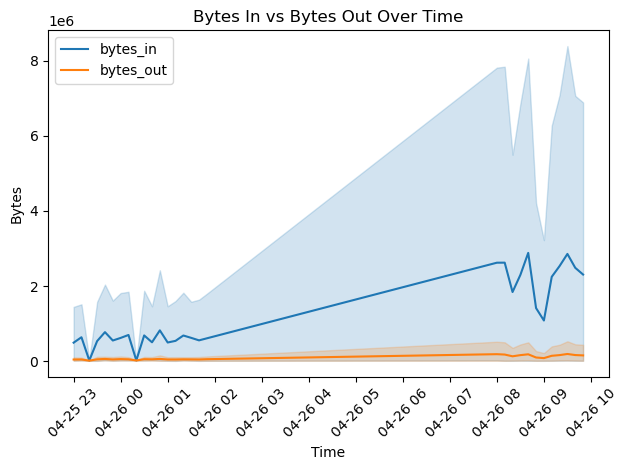

In [11]:
# plot bytes_in and bytes_out over time
sns.lineplot(data=data, x="time", y="bytes_in", label="bytes_in")
sns.lineplot(data=data, x="time", y="bytes_out", label="bytes_out")
plt.title("Bytes In vs Bytes Out Over Time")
plt.xlabel("Time")
plt.ylabel("Bytes")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

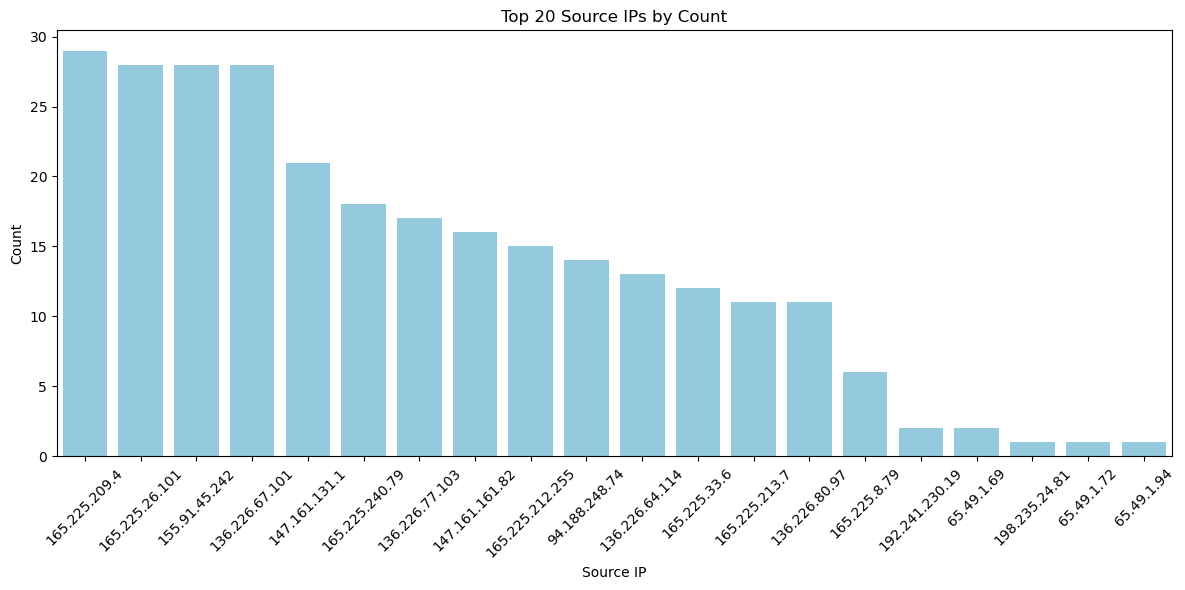

In [12]:
# Count of Source IPs — show top 20 to avoid overcrowding
plt.figure(figsize=(12, 6))
top_src = data['src_ip'].value_counts().nlargest(20).index
sns.countplot(x='src_ip', data=data, order=top_src, color='skyblue')
plt.title('Top 20 Source IPs by Count')
plt.xlabel('Source IP')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

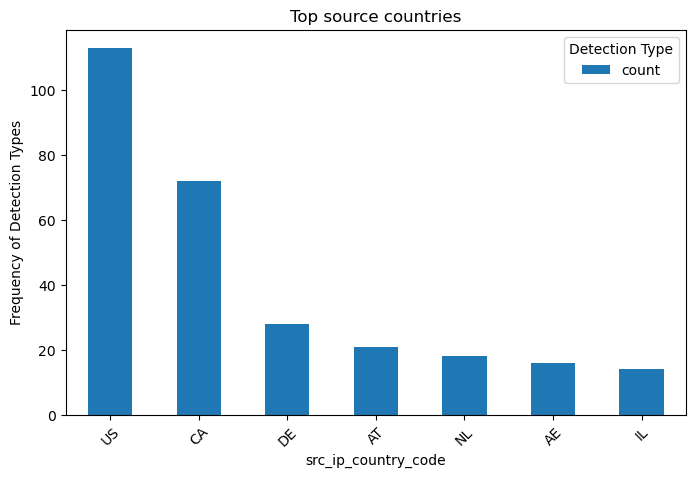

In [13]:
plt.figure(figsize=(8,5))
data['src_ip_country_code'].value_counts().head(10).plot(kind='bar')
plt.ylabel('Frequency of Detection Types')
plt.title("Top source countries")
plt.xticks(rotation=45)
plt.legend(title='Detection Type')
plt.show()

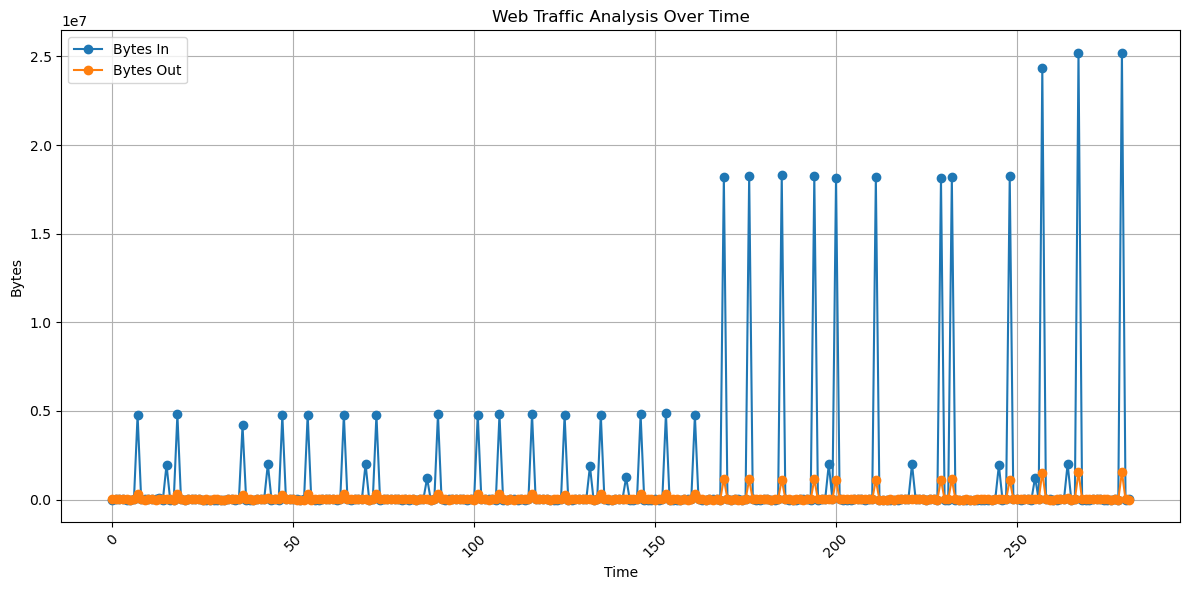

In [14]:
# Duration Distribution
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['bytes_in'], label='Bytes In', marker='o')
plt.plot(data.index, data['bytes_out'], label='Bytes Out', marker='o')
plt.title('Web Traffic Analysis Over Time')
plt.xlabel('Time')
plt.ylabel('Bytes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

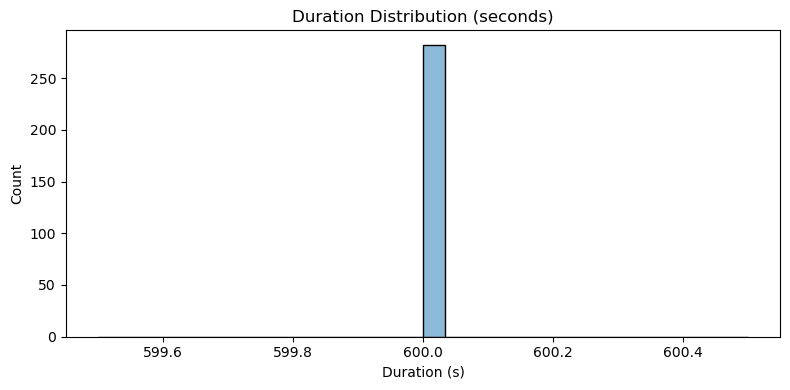

In [15]:
# Duration Distribution
plt.figure(figsize=(8,4))
sns.histplot(data['duration'], bins=30, kde=True)
plt.title('Duration Distribution (seconds)')
plt.xlabel('Duration (s)')
plt.tight_layout()
plt.show()

In [17]:
# Separate categorical columns
cat_columns=data.select_dtypes(include=['object'])

In [18]:
cat_columns

,src_ip,src_ip_country_code,protocol,dst_ip,rule_names,observation_name,source.meta,source.name,detection_types
0,147.161.161.82,AE,HTTPS,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,waf_rule
1,165.225.33.6,US,HTTPS,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,waf_rule
2,165.225.212.255,CA,HTTPS,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,waf_rule
3,136.226.64.114,US,HTTPS,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,waf_rule
4,165.225.240.79,NL,HTTPS,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,waf_rule
...,...,...,...,...,...,...,...,...,...
277,136.226.77.103,CA,HTTPS,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,waf_rule
278,165.225.26.101,DE,HTTPS,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,waf_rule
279,155.91.45.242,US,HTTPS,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,waf_rule
280,165.225.209.4,CA,HTTPS,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,waf_rule


In [19]:
# Separate numerical columns
num_columns=data.select_dtypes(include=['float64', 'int64'])

In [20]:
num_columns

,bytes_in,bytes_out,response.code,dst_port,duration
0,5602,12990,200,443,600.0
1,30912,18186,200,443,600.0
2,28506,13468,200,443,600.0
3,30546,14278,200,443,600.0
4,6526,13892,200,443,600.0
...,...,...,...,...,...
277,41336,13180,200,443,600.0
278,3638,3190,200,443,600.0
279,25207794,1561220,200,443,600.0
280,5736,12114,200,443,600.0


In [21]:
# Encode the categorical features

from sklearn.preprocessing import LabelEncoder

for i in cat_columns:
    le = LabelEncoder()
    cat_columns[i] = le.fit_transform(cat_columns[i])

In [22]:
# Encode the numerical features
for i in num_columns:
    le = LabelEncoder()
    num_columns[i] = le.fit_transform(num_columns[i])

In [ ]:
# Combine encoded numerical and categorical columns
final_data=pd.concat([num_columns,cat_columns],axis=1)

In [24]:
final_data

,bytes_in,bytes_out,response.code,dst_port,duration,src_ip,src_ip_country_code,protocol,dst_ip,rule_names,observation_name,source.meta,source.name,detection_types
0,59,89,0,0,0,5,0,0,0,0,0,0,0,0
1,189,135,0,0,0,12,6,0,0,0,0,0,0,0
2,166,100,0,0,0,8,2,0,0,0,0,0,0,0
3,187,109,0,0,0,0,6,0,0,0,0,0,0,0
4,69,104,0,0,0,10,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,205,92,0,0,0,2,2,0,0,0,0,0,0,0
278,20,16,0,0,0,11,3,0,0,0,0,0,0,0
279,259,238,0,0,0,6,6,0,0,0,0,0,0,0
280,60,81,0,0,0,7,2,0,0,0,0,0,0,0


In [25]:
# Define features and target variable
x = final_data.drop(["detection_types"], axis=1)
y = final_data["detection_types"]

In [27]:
# split the data into training and testing using the feature DataFrame `x` (already defined)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [29]:
# Build and train the model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [30]:
# Use the exact same feature columns (names and order) that the model was trained on
pred = model.predict(x_test[x_train.columns])

In [31]:
# Evaluate the model
model.score(x_test[x_train.columns], y_test)

1.0

In [32]:
# Evaluate the model
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57



In [34]:

# Features and labels
X = data[['bytes_in', 'bytes_out']].values  # Using only numeric features
y = data['detection_types'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# !pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Neural network model
model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])


c:\Users\mlmoh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
# Ensure labels are numeric for Keras (binary/single-output model)
# LabelEncoder was already imported earlier in the notebook (cell 22)
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train).astype('float32')
y_test_enc = le.transform(y_test).astype('float32')

# Train the model
history = model.fit(
	X_train_scaled,
	y_train_enc,
	epochs=10,
	batch_size=8,
	verbose=1,
	validation_data=(X_test_scaled, y_test_enc)
)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9797 - loss: 0.6223 - val_accuracy: 1.0000 - val_loss: 0.5863
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.5411 - val_accuracy: 1.0000 - val_loss: 0.5120
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.4612 - val_accuracy: 1.0000 - val_loss: 0.4215
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.3685 - val_accuracy: 1.0000 - val_loss: 0.3283
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.2815 - val_accuracy: 1.0000 - val_loss: 0.2464
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.2058 - val_accuracy: 1.0000 - val_loss: 0.1744
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.1423 - val_accuracy: 1.0000 - val_loss: 0.1184
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0959 - val_accuracy: 1.0000 - val_l

In [37]:
# Use the encoded numeric labels (y_test_enc) — model expects numeric targets, not strings
loss, accuracy = model.evaluate(X_test_scaled, y_test_enc)
print(f"Test Accuracy: {accuracy*100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 0.0405 
Test Accuracy: 100.00%
